This numerical handbook is given under the CC-BY-NC-SA licence. It was written by Martin Vérot (ENS de Lyon, France) for undergrad students of the Sciences de la Matière Department. It comes as a supplement of this course (in French) [polycopié de cours](http://agregationchimie.free.fr/cours.php#incertitudes) 

[Discrete distribution](#galton)
* [Coin flip](#galton)
    * [first draw](#nvalue)
    * [multiple draws](#pvalue)
    * [normal distribution of the mean](#fitNorm)
    * [a visual demonstration](#galtonvid)
* [Binomial Distribution](#binom)
* [Poisson Distribution](#poisson)

[Continuous Distributions](#continues)
* [Rectangular Distribution](#continues)
    * [first draw](#rect1)
    * [multiple draws](#rect2)
    * [normal distribution of the mean](#rect3)
* [Triangular Distribution](#triang)
    * [first draw](#triang1)
    * [multiple draws](#triang2)
* [A non Symmetric Distribution : Gamma Distribution ](#gamma)
    * [first draw](#gamma1)
    * [multiple draws](#gamma2)   
* [A distribution not verfying the central limit theorem : the Lorentz/Cauchy Distribution](#cauchy)

[Speed of convergence](#convergence)


# Intuitive Demonstration of the Central Limit Theorem

The normal distribution is at the heart of numerous formulas used in metrology. Even if the implicit distributions of the variables are not necessarily normal. Without being rigorous, this notebooks aims at proving how you can have output variables being normal even if input variables are not.

As a reminder, a normal distribution with an expectation value $\bar{z}$ and standard deviation $\sigma$ is given by :
$$  G_{\bar{z},\sigma}(z)=\dfrac{1}{\sigma\sqrt{2\pi}}\exp\left( {-\dfrac{\left( z-\bar{z} \right)^{2}}{2\sigma^{2}}} \right)$$

## Discrete Distribution : Coin Flip
<span id="galton"></span>

The idea is to start with coin flips supposing that there is an equiprobability of having heads or tails. A heads gives corresponds to a result of 1 while a tails correspond to 0.

Instead of doing one coin flip, the idea is to perform $n$ draws with a relatively high value of $n$. Then we will sum up the values and take the average to have a final result between 0 and 1.
$$\bar{z}=f(z_1,...z_n)=\dfrac{1}{n}\sum_{i=1}^nz_i$$
<span id="nvalue"></span>

In [1]:
import numpy as np
n = 100
#Here we perform a first draw of n=100 coin flips
first_draw = np.random.randint(2, size=n)
print('{} draws either 0 or 1'.format(n))
print(first_draw)
#averaging the result
z0 = np.average(first_draw)
print('The average is : {:.2f}'.format(z0))

100 draws either 0 or 1
[0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1
 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1
 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0]
The average is : 0.46


You should have a result close to 0.5. Don't hesitate to rerun the code to see that the average is not fixed.

Now instead of 1 series of coin flips, we will repeat $p$ series to observe the distribution of the averages.

<span id="pvalue"></span>

"\nRelaunch this cell, change the value of the p variable to see its influence.\n\nTo re-execute the code, hit the 'up' key the 'Shift+Enter'\n"

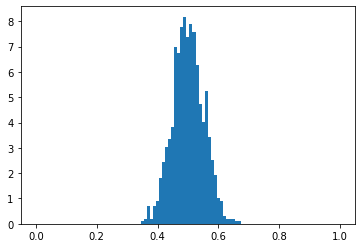

In [2]:
p = 1000
zs = np.average(np.random.randint(2, size=(n,p)), axis = 0 )


"""
We will now plot the distribution of the results to see the distribution of the averages.
"""

import matplotlib as mpl
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(zs,bins=101,range=(0.,1.),density=True)
"""
Relaunch this cell, change the value of the p variable to see its influence.

To re-execute the code, hit the 'up' key the 'Shift+Enter'
"""


For $p=1000$, the final distribution can have a strange look, but if you increase it to  10 000, 100 000 or 1 million, it gets more and more stable and converges to a bell shape corresponding to the ... normal distribution. It is interesting to make a link between the parameters of this normal distribution (expectation value and standard deviation) and the parameters of the problem. 
<span id="fitNorm"></span>

In [3]:
#average of the distribution
average = np.average(zs)
#variance of the distribution
variance = np.var(zs,ddof=1)
standardDeviation= np.std(zs,ddof=1)
print('average: {} variance : {} standard deviation : {}'.format(average, variance,standardDeviation))

average: 0.50086 variance : 0.002616276676676677 standard deviation : 0.0511495520672144


We can compare our numerical values to the theoretical ones. The average value should be 0.5. The standard deviation, it is a little bit more tedious : we must first compute the variance, and then the square root of it :

$$\begin{align}
V(z_i)={}&=\dfrac{1}{2}\sum_{j=1}^2(z_j-\bar{z})^2=0,25\\
V(\bar{z})={}&\dfrac{1}{n} \sum_{j=1}^n V(z_i) =\dfrac{1}{n} \times 0,25 \\
\sigma_\bar{z} ={}& \sqrt{V(\bar{z})} = \dfrac{\sigma_{z_i} }{\sqrt{n}}
\end{align}$$

The numerical results should be close to those theoretical values with the proper value for $n$.


**We can see an intersting result here : the variance of the average $\bar{z}$ decreases as $\frac{1}{n}$. As a consequence, the bigger the size of the sample, the smaller its standard deviation will be.** This is a really important result in metrology : whatever the initial uncertainty on your initial measure $z_i$, if you average over enough measurments, you can have a mean as precise as you want.

You can "confirm" this result by changing the value of the $n$ variable [above](#nvalue).

Now that we saw that we can have estimates of a normal distribution sharing the same mean and standard deviation as our sample, we can superimpose both to compare how well the gaussian distribution depicts our averages. As the value of the $p$ variable defined [above](#pvalue) becomes big, the normal distribution should describe really well the distribution of the numerical averages.

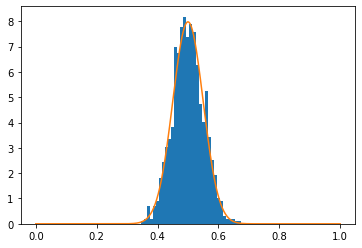

In [4]:
#Plotting the histgram
plt.hist(zs,bins=101,range=(0.,1.),density=True)
#Plotting the normal distribution corresponding
xs=np.linspace(0,1,1000)
from scipy.stats import norm
plt.plot(xs, norm.pdf(xs,loc=0.5,scale=np.sqrt(0.25/n) ) )

<span id="galtonvid"></span>
We indirectly showed that the mean of a binomial distribution goes to a normal distribution. A more visual experiment can be done with the Galton Board (see video below) where the number of pike ranks corresponds to $n$ and the number of balls is equal to $p$. The position of the column being the mean. 

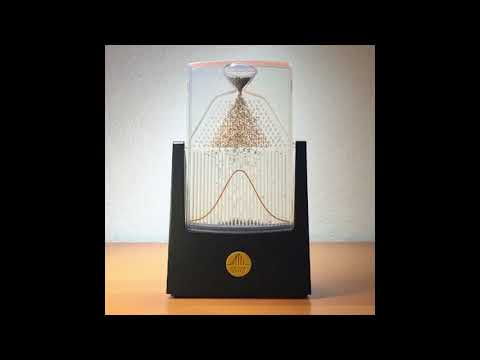

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('EvHiee7gs9Y', width=600, height=400)

<span id="binom"></span>
### Generalization for a Binomial Distribution
The binomial distribution corresponds to the probability of having  a result equal to $k$ after $q$ draws with a probability of sucess equal to $r$ (a success giving a 1 and a failure a 0). If $r=0.5$, we fall back to the previous example where $n=q$.

$$\mathbb{P}_{\mathcal{B}_{q,r}}(X=k)=\begin{pmatrix}
q \\ 
k
\end{pmatrix} r^k(1-r)^{q-k}$$
$$\mathbb{E}_{\mathcal{B}_{q,r}}=qr \qquad\qquad V_{\mathcal{B}_{q,r}} = qr(1-r) \qquad\qquad \sigma_{\mathcal{B}_{q,r}} = \sqrt{qr(1-r)}$$

the found average is : 5.23


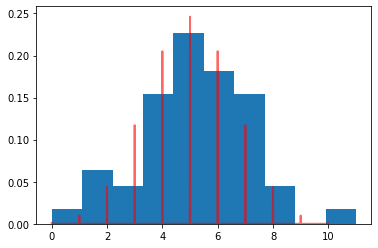

In [6]:
from scipy.stats import binom
q=10 #number of draws in the binomial distribution
r=0.5 #probability of success
n=100 #nombre of draws to perform the average
p=1000 #number of averages computed

first_draw = binom.rvs(q,r,size=n)
count, bins, ignored = plt.hist(first_draw,bins=q,range=(0.,q+1),density=True)
#Plotting the theoretical distribution of the binomial distribution
xs = np.linspace(0,q,1001)
plt.plot(xs, binom.pmf(xs,q,0.5),'r-', lw=2, alpha=0.6)
#on additionne les n valeurs et on prend la moyenne
z0 = np.average(first_draw)
print('the found average is : {:.2f}'.format(z0))

sample         average: 4.997 variance : 0.027 standard deviation : 0.165
theoretical    average: 5.000 variance : 0.025 standard deviation : 0.158


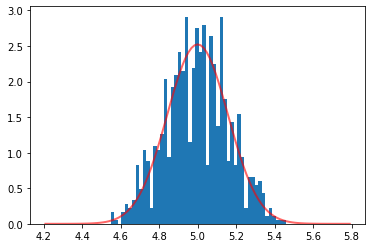

In [7]:
#We now repeat it p times
zs = np.sum(binom.rvs(q,r,size=(n,p)), axis=0)/n
#average of the distribution
average = np.average(zs,axis=0)
#variance of the distribution
variance = np.var(zs,ddof=1,axis=0)
standardDeviation = np.std(zs,ddof=1,axis=0)
#plotting the histogram of the averages
plt.hist(zs,bins=50,range=(np.min(zs),np.max(zs)),density=True)
#plotting the corresponding gaussian distribution
xs = np.linspace(q*r-5* np.sqrt((q/n)*r*(1-r)),q*r+5*np.sqrt((q/n)*r*(1-r)),n+1)
plt.plot(xs, norm.pdf(xs,q/2,np.sqrt((q/n)*r*(1-r))),'r-', lw=2, alpha=0.6)

print('sample         average: {:.3f} variance : {:.3f} standard deviation : {:.3f}'.format(average, variance,standardDeviation))
print('theoretical    average: {:.3f} variance : {:.3f} standard deviation : {:.3f}'.format(q/2, (q/n)*r*(1-r),np.sqrt((q/n)*r*(1-r)) ) )

<span id="poison"></span>
### For the Poisson Distribution

This distribution is useful to describe rare events, when their probability is independent of the previous event. This dsitribution corresponds to a binomial distribution where $qr = \mu$ with $q$ rather big and $r$ rather small.

$$\mathbb{P}_{\mathcal{P}_{\mu}}(X=k)=\dfrac{\mu^k}{k!}\mathrm{e}^{-\mu}$$
$$\mathbb{E}_{\mathcal{P}_{\mu}}=\mu \qquad\qquad V_{\mathcal{P}_{\mu}} = \mu \qquad\qquad \sigma_{\mathcal{P}_{\mu}} = \sqrt{\mu}$$
If we have 4 nuclear desintegration on average every 5 minutes and we count events every 15 minutes, we will take $\mu=4\times \dfrac{15}{5}=12$.

the found average is : 1.11


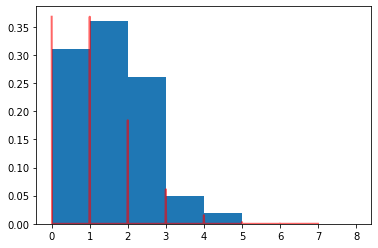

In [8]:
from scipy.stats import poisson
n=100
p=1000
mu=1
first_draw = poisson.rvs(mu,size=n)
count, bins, ignored = plt.hist(first_draw,range=(0,8),bins=8,density=True)
#affichage de la fonction de distribution théorique
xs = np.linspace(0,7,701)
plt.plot(xs, poisson.pmf(xs,mu),'r-', lw=2, alpha=0.6)
#on additionne les n valeurs et on prend la moyenne
z0 = np.average(first_draw)
print('the found average is : {:.2f}'.format(z0))

sample      average: 1.001 variance : 0.010 standard deviation : 0.102
theoretical average: 1.000 variance : 0.010 standard deviation : 0.100


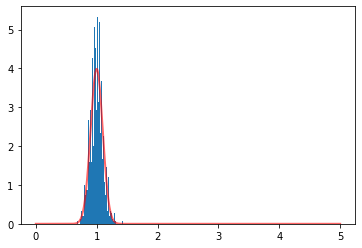

In [9]:
#We now repeat it p times
zs = np.sum(poisson.rvs(mu,size=(n,p)), axis=0)/n
#average of the distribution
average = np.average(zs,axis=0)
#variance of the distribution
variance = np.var(zs,ddof=1,axis=0)
standardDeviation = np.std(zs,ddof=1,axis=0)
#plotting the histogram of the averages
plt.hist(zs,bins=50,range=(np.min(zs),np.max(zs)),density=True)
#plotting the corresponding gaussian distribution
xs = np.linspace(0,5,1001)
plt.plot(xs, norm.pdf(xs,mu,np.sqrt(mu/n)),'r-', lw=2, alpha=0.6)
print('sample      average: {:.3f} variance : {:.3f} standard deviation : {:.3f}'.format(average, variance,standardDeviation))
print('theoretical average: {:.3f} variance : {:.3f} standard deviation : {:.3f}'.format(mu, mu/n,np.sqrt(mu/n) ) )

## Coutinous Distributions
<span id="continues"></span>
### Rectangular Distribution 

Instead of a discrete distribution, we will now take a continuous one : the rectangular distribution. 

The probability density function is given by :
$$\begin{align}
\rho(z) ={}& \dfrac{1}{b-a} \qquad\qquad a\leqslant x<b\\
={}&0 \qquad\qquad\qquad \text{otherwise}
\end{align}$$
$$\bar{z}=\dfrac{a+b}{2}\qquad\qquad V = \dfrac{(b-a)^2}{12}\qquad\qquad \sigma=\dfrac{(b-a)}{2\sqrt{3}}$$
Here, we will take a rectangular distribution over the interval $[0,1[$.

<br>
<details>
  <summary> ** Click to see details on the variance **</summary> 
   The average is easy to compute : $0,5$. 
    
    However, for the variance, we must use the result linking its standard deviation to its spread :
$$\begin{align}V(z_i) ={}&\dfrac{1}{b-a} \int_a^b (z-\bar{z})^2\mathrm{d}\,z = \dfrac{1}{b-a}\int_a^b \left(z-\dfrac{a+b}{2}\right)^2\mathrm{d}\,z\\
\text{we set $u=z-\dfrac{a+b}{2}$}\\
={}&\dfrac{1}{b-a} \int_{\frac{a-b}{2}}^{\frac{b-a}{2}} u^2\mathrm{d}\,u = \dfrac{1}{b-a} \left[\dfrac{u^3}{3}\right]_{\frac{a-b}{2}}^{\frac{b-a}{2}} = \dfrac{\left(b-a\right)^2}{12}\end{align}$$
here, we thus have :
$$\begin{align}V(\bar{z})={}&\dfrac{1}{12n}\\
\sigma_\bar{z}={}& \dfrac{1}{\sqrt{12n}}=\dfrac{1}{2\sqrt{3}}\dfrac{1}{\sqrt{n}}
\end{align}$$
</details>    



<span id="rect1"></span>

the found average is : 0.51


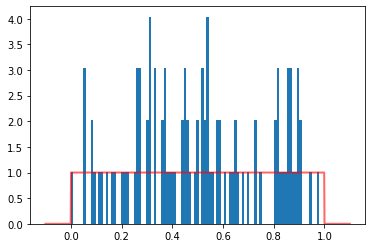

In [10]:
from scipy.stats import uniform
n=100
p=1000

first_draw = uniform.rvs(0.,1., size=n)
#plotting the histogram
plt.hist(first_draw,bins=101,range=(0.,1.),density=True)
#plotting the theoretical distribution
xs = np.linspace(-0.1,1.1,1000)
plt.plot(xs, uniform.pdf(xs,loc=0.,scale=1),'r-', lw=2, alpha=0.6)

#computing the first average
z0 = np.average(first_draw)
print('the found average is : {:.2f}'.format(z0))

sample      average: 0.498 variance : 0.001 standard deviation : 0.028
theoretical average: 0.500 variance : 0.001 standard deviation : 0.029


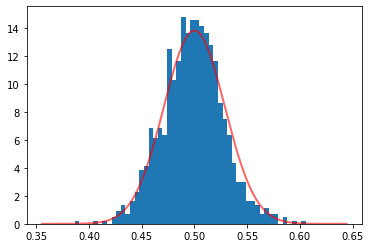

In [11]:
#We now repeat it p times
zs = np.sum(uniform.rvs(0.,1.,size=(n,p)), axis=0)/n
#average of the distribution
average = np.average(zs,axis=0)
#variance of the distribution
variance = np.var(zs,ddof=1,axis=0)
standardDeviation = np.std(zs,ddof=1,axis=0)
#plotting the histogram of the averages
plt.hist(zs,bins=50,range=(np.min(zs),np.max(zs)),density=True)
#Tracé de la gaussienne correspondant
xs = np.linspace(0.5-5*1/(np.sqrt(12*n)),0.5+5*1/(np.sqrt(12*n)),1001)
plt.plot(xs, norm.pdf(xs,loc=0.5,scale=1/(np.sqrt(12*n)) ),'r-', lw=2, alpha=0.6)
print('sample      average: {:.3f} variance : {:.3f} standard deviation : {:.3f}'.format(average, variance,standardDeviation))
print('theoretical average: {:.3f} variance : {:.3f} standard deviation : {:.3f}'.format(0.5,1/((12*n)) ,1/(np.sqrt(12*n)) ))

Here again, we end up with a normal distribution for the average of $n$ values. The most difficult is to compute the adequate variance for the given distribution.

<span id="triang"></span>

### Triangular Distribution
It's all the same but we have to adapt the results for the variance/standard deviation and take the proper scipy function.
<span id="triang1"></span>

$$\begin{equation}
 T_{\bar{z},\sigma}(z)=
 \begin{cases}
     \dfrac{1}{\Delta z^{2}}\left( z-\left( \bar{z}-\dfrac{\Delta z}{2} \right) \right) \quad\quad\quad \bar{z}-\dfrac{\Delta z}{2}\leqslant z \leqslant \bar{z}\\
     \dfrac{1}{\Delta z^{2}}\left( \left( \bar{z}+\dfrac{\Delta z}{2} \right) -z\right) \quad\quad\quad \bar{z}\leqslant z \leqslant \bar{z}+\dfrac{\Delta z}{2}
    \end{cases}
\end{equation}$$

For a triangular distribution centered on $\bar{z}$ with a total width of $\Delta z$

the found average is : 0.48


'To see the agreement between the theoretical distribution and the real one, you may increase the value of the n variable.'

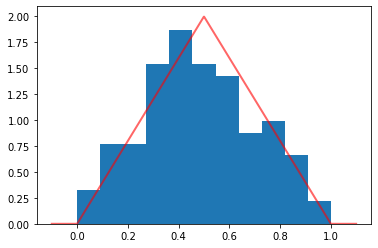

In [12]:
from scipy.stats import triang
n=100
p=1000


first_draw = triang.rvs(0.5,loc=0,scale=1, size=n)
plt.hist(first_draw,bins=n//10+1,range=(0.,1.),density=True)
#plotting the theoretical distribution
xs = np.linspace(-0.1,1.1,1000)
plt.plot(xs, triang.pdf(xs,0.5,loc=0,scale=1),'r-', lw=2, alpha=0.6)

z0 = np.average(first_draw)
print('the found average is : {:.2f}'.format(z0))
"""To see the agreement between the theoretical distribution and the real one, you may increase the value of the n variable."""

As previously, we can repeat $p$ times and find the normal distribution with the proper paramaters.
<span id="triang2"></span>

sample      average: 0.499 variance : 0.000 standard deviation : 0.021
theoretical average: 0.500 variance : 0.000 standard deviation : 0.020


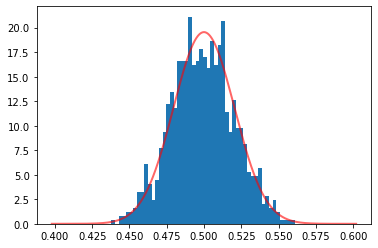

In [13]:
#We now repeat it p times
zs = np.sum(triang.rvs(0.5,loc=0,scale=1,size=(n,p)), axis=0)/n
#average of the distribution
average = np.average(zs,axis=0)
#variance de la distribution
variance = np.var(zs,ddof=1,axis=0)
standardDeviation = np.std(zs,ddof=1,axis=0)
plt.hist(zs,bins=50,range=(np.min(zs),np.max(zs)),density=True)
#plotting the corresponding gaussian distribution
xs = np.linspace(0.5-5*1/(np.sqrt(24*n)),0.5+5*1/(np.sqrt(24*n)),1001)
plt.plot(xs, norm.pdf(xs,loc=0.5,scale=1/(np.sqrt(24*n)) ),'r-', lw=2, alpha=0.6)
print('sample      average: {:.3f} variance : {:.3f} standard deviation : {:.3f}'.format(average, variance,standardDeviation))
print('theoretical average: {:.3f} variance : {:.3f} standard deviation : {:.3f}'.format(0.5,1/((24*n)) ,1/(np.sqrt(24*n)) ))

<span id="gamma"></span>
### Gamma Distribution 
At this point, all the continuous distributions where symmetric and it may not work for a really non symmetic distribution. We will see that in fact the Central Limit Theorem stil holds !

The Gamma distribution is defined as follow :
$$f(x,\alpha)=\dfrac{x^{a-1}\exp(-x)}{\Gamma(a)}$$

Where $\Gamma(a)$ is the gamma *function*. 

This distribution is used to describe the probability to have a given number of events with respect to time, the probability of each event being constant.

the found average is : 0.43


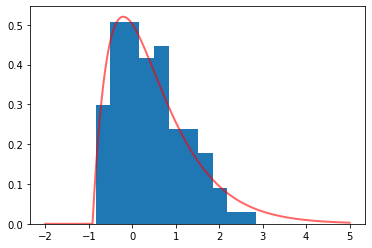

In [117]:
from scipy.stats import gamma
n=100
p=1000
first_draw = gamma.rvs(2,loc=0.5-np.sqrt(2),scale=1/np.sqrt(2), size=n)
plt.hist(first_draw,bins=n//10+1,density=True)
#plotting the theoretical distribution
xs = np.linspace(-2,5,1000)
plt.plot(xs, gamma.pdf(xs,2,loc=0.5-np.sqrt(2),scale=1/np.sqrt(2)),'r-', lw=2, alpha=0.6)

z0 = np.average(first_draw)
print('the found average is : {:.2f}'.format(z0))

sample      average: 0.500 variance : 0.000 standard deviation : 0.010
theoretical average: 0.500 variance : 0.000 standard deviation : 0.010


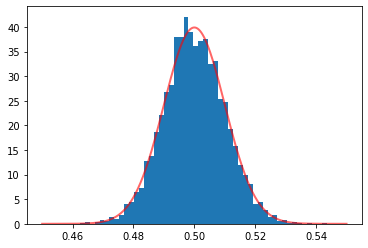

In [110]:
p=10000
n=10000
#We now repeat it p times
zs = np.average(gamma.rvs(2,loc=0.5-np.sqrt(2),scale=1/np.sqrt(2),size=(n,p)), axis=0)
#average of the distribution
average = np.average(zs,axis=0)
#variance de la distribution
variance = np.var(zs,ddof=1,axis=0)
standardDeviation = np.std(zs,ddof=1,axis=0)
plt.hist(zs,bins=50,range=(np.min(zs),np.max(zs)),density=True)
#plotting the corresponding gaussian distribution
xs = np.linspace(0.5-5/np.sqrt(n),0.5+5/np.sqrt(n),1001)
plt.plot(xs, norm.pdf(xs,loc=0.5,scale=1/(np.sqrt(n)) ),'r-', lw=2, alpha=0.6)
print('sample      average: {:.3f} variance : {:.3f} standard deviation : {:.3f}'.format(average, variance,standardDeviation))
print('theoretical average: {:.3f} variance : {:.3f} standard deviation : {:.3f}'.format(0.5,1/n ,1/(np.sqrt(n)) ))

<span id="cauchy"></span>
### A Distribution that does not Respect the Central Limit Theorem : the Lorentz/Cauchy Distribution

We just saw that for two different distributions, the Central Limit Theorem is fullfilled. However, we can't generalize to quickly ! One of the main prerequisite for the Central Limit Theorem is to have an existing standard deviation for the initial distribution of the $z_i$ (or at least an upper limit). If it's not the case, then the Central Limit Theorem can fail. 

We will pinpoint it with  the Lorentz/Cauchy Distribution. This distribution is not just a «rulebreaker» :  it describes the broadening of spectral lines for a gas where particles collide, it also describes the shape of X-ray peaks, etc.

the found average is : 12.97


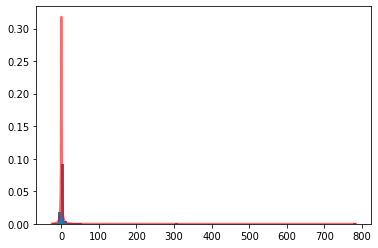

In [14]:
from scipy.stats import cauchy
first_draw = cauchy.rvs(loc=0.5,scale=1,size=n)
plt.hist(first_draw,bins=101,density=True)

#the theoretical distribution
xs = np.linspace(np.min(first_draw),np.max(first_draw),1000)
plt.plot(xs, cauchy.pdf(xs,loc=0.5,scale=1),'r-', lw=2, alpha=0.6)
#Averaging
z0 = np.average(first_draw)
print('the found average is : {:.2f}'.format(z0))

moyenne: 1.4710842550914194 variance : 3704.2857862252495 écart-type : 60.86284405304479


're run this code to see that neither the mean nor the standard deviation converge'

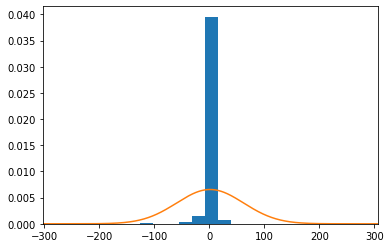

In [15]:
#We now repeat it p times
zs = np.average(cauchy.rvs(loc=0.5,scale=1., size=(n,p)), axis = 0 )
#average of the distribution
average = np.average(zs,axis=0)
#variance de la distribution
variance = np.var(zs,ddof=1,axis=0)
standardDeviation = np.std(zs,ddof=1,axis=0)

print('moyenne: {} variance : {} écart-type : {}'.format(average, variance,standardDeviation))
#Plotting the histogram
plt.hist(zs,bins=101,range=(np.min(zs),np.max(zs)),density=True)
#the gaussian that should fit the data 
xs=np.linspace(average-5*standardDeviation,average+5*standardDeviation,1000)
plt.plot(xs, norm.pdf(xs,loc=average,scale=standardDeviation ) )
plt.xlim(average-5*standardDeviation,average+5*standardDeviation)
"""re run this code to see that neither the mean nor the standard deviation converge"""

When can try to see how badly the Central Limit Theorem fails for the Cauchy distribution compared to a case where it works (here the rectangular case).

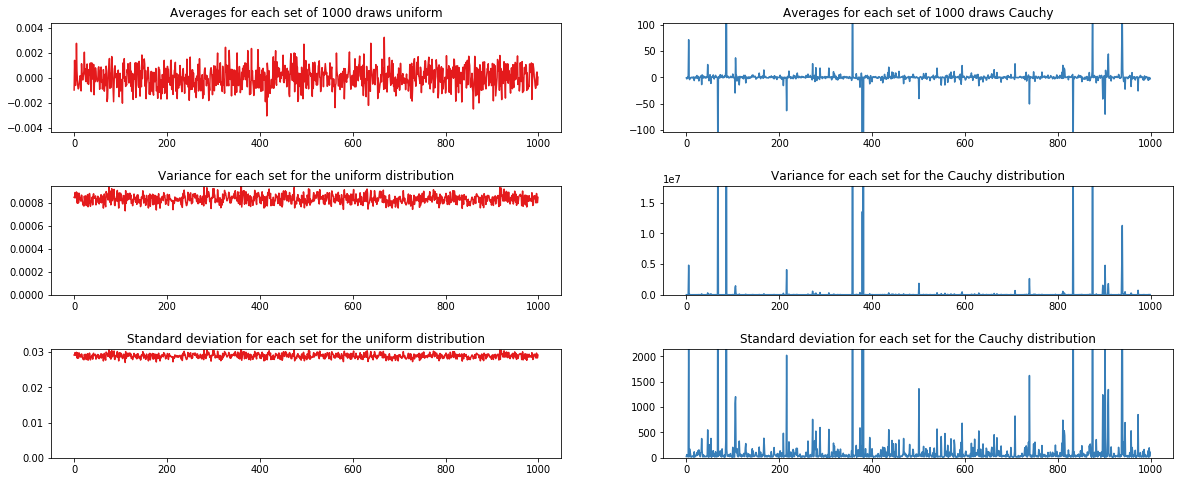

In [16]:
"""repetition for 1000 samples of p averages made from n draws"""
n=100
p=1000

distribs = ['uniform','Cauchy']
results = {'uniform':{'color':'#e41a1c'},
          'Cauchy':{'color':'#377eb8'}}


for distrib in distribs:
    if distrib == 'Cauchy':
        zs = np.sum(cauchy.rvs(scale=1., size=(n,p,1000)), axis = 0 )/n
    elif distrib == 'uniform':
        zs = np.sum(uniform.rvs(loc=-0.5,scale=1., size=(n,p,1000)), axis = 0 )/n
    results[distrib]['averages'] = np.average(zs,axis=0) #Moyenne de la distribution
    results[distrib]['variances'] = np.var(zs,ddof=1,axis=0) #variance de la distribution
    results[distrib]['standardDeviation'] = np.std(zs,ddof=1,axis=0) #ecart-type de la distribution
    ##averages and standard deviation for the 1000 sets of 1000 draws
    results[distrib]['maverage']   = np.average(results[distrib]['averages'])
    results[distrib]['eaverage']   = np.std(results[distrib]['averages'],ddof=1)
    results[distrib]['mvariance']  = np.average(results[distrib]['variances'])
    results[distrib]['evariance']  = np.std(results[distrib]['variances'],ddof=1)
    results[distrib]['mecartType'] = np.average(results[distrib]['standardDeviation'])
    results[distrib]['eecartType'] = np.std(results[distrib]['standardDeviation'],ddof=1)

fig = plt.figure(figsize=(64,8))
gs = fig.add_gridspec(3, len(distrib),hspace=0.5)

xs = np.arange(p) # xs corresponding to each set of 1000 draws
for (i,distrib) in enumerate(distribs):
    ax1 = fig.add_subplot(gs[0,i])
    #plotting averages over  the 1000 sets of 1000 draws
    ax1.plot(xs,results[distrib]['averages'],color=results[distrib]['color'])
    ax1.set_ylim(results[distrib]['maverage']-5*results[distrib]['eaverage'],results[distrib]['maverage']+5*results[distrib]['eaverage'])
    ax1.set_title('Averages for each set of 1000 draws {}'.format(distrib))
    #plotting variance over  the 1000 sets of 1000 draws
    ax2 = fig.add_subplot(gs[1,i])
    ax2.plot(xs,results[distrib]['variances'],color=results[distrib]['color'])
    ax2.set_ylim(0,results[distrib]['mvariance']+3*results[distrib]['evariance'])
    ax2.set_title('Variance for each set for the {} distribution'.format(distrib))
    #plotting standard deviation over  the 1000 sets of 1000 draws
    ax3 = fig.add_subplot(gs[2,i])
    ax3.plot(xs,results[distrib]['standardDeviation'],color=results[distrib]['color'])
    ax3.set_ylim(0,results[distrib]['mecartType']+3*results[distrib]['eecartType'])
    ax3.set_title('Standard deviation for each set for the {} distribution'.format(distrib))

We can see that for the Cauchy distribution, the results are not stable at all compared to the ones oberved for the uniform distribution. This is because the Cauchy distribution is said to have "fat tails" : values far from the expected value have not negligeable chance to be drawn. When such a value is drawn, it can shift significantly the value of the average and standard deviation.

<span id="convergence"></span>
# Speed of convergence
We saw on several examples that the distribution of the average converges to a normal distribution. If all the initial distributions $\rho$ have the same standard deviation, the standard deviation of the average converges at the same speed whatever the initial distribution $\rho$ is.

Here, we will take three different $\rho$ distributions : the rectangular, triangular and gamma ones with the same standard deviation and expectation value (1 and 0 respectively).

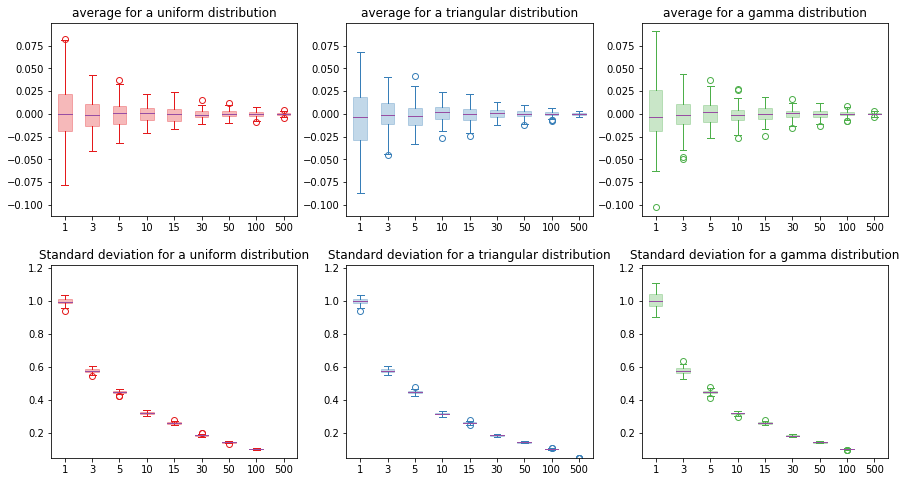

In [115]:
ns = [1,3,5,10,15,30,50,100,500]
distribs = ['uniform','triangular','gamma']
results = {'uniform':{'average':[],'ecarttype':[],'zs':[],'color':'#e41a1c'},
          'triangular':{'average':[],'ecarttype':[],'zs':[],'color':'#377eb8'},
          'gamma':{'average':[],'ecarttype':[],'zs':[],'color':'#4daf4a'}}
p = 1000
sampling = 100
for n in ns:
    for distrib in distribs:
        """repetition over "sampling" sets of "p" averages done from "n" draws """
        if distrib == 'uniform':
            zs = np.sum(uniform.rvs(loc=-np.sqrt(3),scale=2*np.sqrt(3), size=(n,p,sampling)), axis = 0 )/n
        elif distrib== 'triangular':
            zs = np.sum(triang.rvs(0.5,loc=-np.sqrt(6),scale=2*np.sqrt(6), size=(n,p,sampling)), axis = 0 )/n  
        elif distrib== 'gamma' :
            zs = np.sum(gamma.rvs(1,loc=0,scale=1., size=(n,p,sampling)), axis = 0 )/n-1
        #average of the distribution
        averages = np.average(zs,axis=0)
        #standard deviation  of the distribution
        standardDeviation = np.std(zs,ddof=1,axis=0)
        results[distrib]['average'].append(averages)
        results[distrib]['ecarttype'].append(standardDeviation)
        results[distrib]['zs'].append(zs)

#plotting the graphs

#to have similar scales for the graphs and make a fair comparison
minimum_moy = np.min([results['uniform']['average'],results['triangular']['average'],results['gamma']['average']])
maximum_moy = np.max([results['uniform']['average'],results['triangular']['average'],results['gamma']['average']])
minimum_et = np.min([results['uniform']['ecarttype'],results['triangular']['ecarttype'],results['gamma']['ecarttype']])
maximum_et = np.max([results['uniform']['ecarttype'],results['triangular']['ecarttype'],results['gamma']['ecarttype']])


fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2, len(distribs),hspace=0.25)  

for (i,distrib) in enumerate(distribs) :
    ax1 = fig.add_subplot(gs[0,i])
    ax1.set_title('average for a {} distribution'.format(distrib))
    #ax1.set_xscale('log')
    ax1.boxplot(results[distrib]['average'],positions=range(len(ns)),labels=ns,patch_artist=True,boxprops=dict(alpha=.3,facecolor=results[distrib]['color'], color=results[distrib]['color']),
            capprops=dict(color=results[distrib]['color']),
            whiskerprops=dict(color=results[distrib]['color']),
            flierprops=dict(color=results[distrib]['color'], markeredgecolor=results[distrib]['color']),
            medianprops=dict(color='#984ea3'))
    ax1.set_ylim(1.1*minimum_moy,1.1*maximum_moy)
    ax2 = fig.add_subplot(gs[1,i])
    ax2.set_title('Standard deviation for a {} distribution'.format(distrib))    
    #ax2.set_xscale('log')    
    ax2.boxplot(results[distrib]['ecarttype'],positions=range(len(ns)),labels=ns,patch_artist=True,boxprops=dict(alpha=.3,facecolor=results[distrib]['color'], color=results[distrib]['color']),
            capprops=dict(color=results[distrib]['color']),
            whiskerprops=dict(color=results[distrib]['color']),
            flierprops=dict(color=results[distrib]['color'], markeredgecolor=results[distrib]['color']),
            medianprops=dict(color='#984ea3'))
    ax2.set_ylim(1.1*minimum_et,1.1*maximum_et)

We can check more thorougly by tracing the contributions of each set to the average as a function of $n$ (each row), for each distribution (in column : uniform, triangular and gamma).

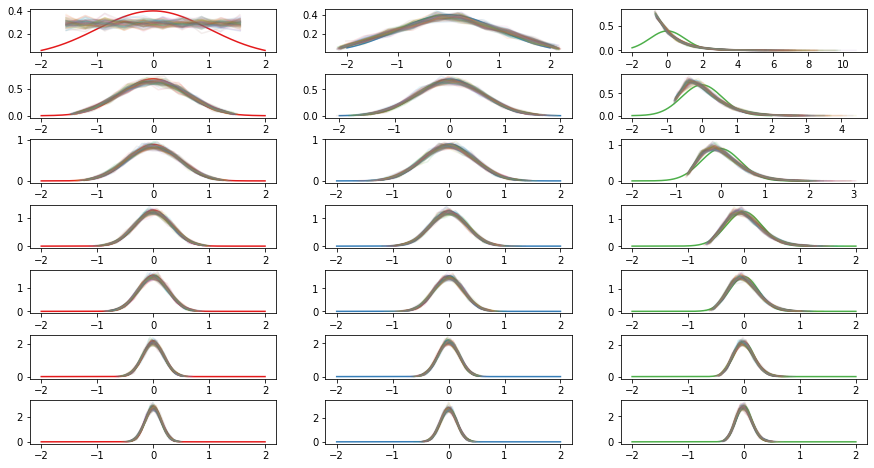

In [116]:
ns = [1,3,5,10,15,30,50]
xs = np.linspace(-2,2,1000)
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(len(ns), len(distribs),hspace=0.5)  
#plotting of the graphs
for (i,distrib) in enumerate(distribs) :
    for (l,n) in enumerate(ns):
        ax3 = fig.add_subplot(gs[l,i])
        ax3.plot(xs,norm.pdf(xs,0,1/np.sqrt(n)),alpha=1,color=results[distrib]['color'])
        for d in range(sampling):
            hist,bins = np.histogram(results[distrib]['zs'][l][:,d],density=True)
            ax3.plot((bins[:-1]+bins[1:])/2,hist,alpha=0.1)

The results are similar for discrete distributions.

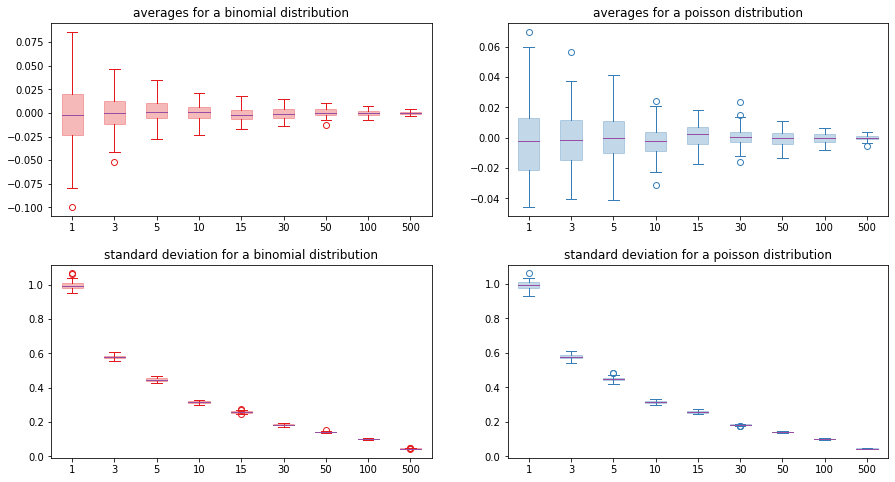

In [19]:
from scipy.stats import poisson
ns = [1,3,5,10,15,30,50,100,500]
distribs = ['binomial','poisson']
#distribs = ['poisson']
results = {'binomial':{'average':[],'standardDeviation':[],'zs':[],'color':'#e41a1c'},
          'poisson':{'average':[],'standardDeviation':[],'zs':[],'color':'#377eb8'}}
q=4
mu=1
p = 1000
sampling = 100
for n in ns:
    for distrib in distribs:
        """repetition over "sampling" sets of "p" averages done from "n" draws """
        if distrib == 'binomial':
            zs = np.sum(binom.rvs(q,r,size=(n,p,sampling)), axis=0)/n-q/2
        elif distrib== 'poisson':
            zs = np.sum(poisson.rvs(mu,size=(n,p,sampling)), axis = 0 )/n-1
        #Moyennes de la distribution
        averages = np.average(zs,axis=0)
        #Écart-types de la distribution
        ecartTypes = np.std(zs,ddof=1,axis=0)
        results[distrib]['average'].append(averages)
        results[distrib]['standardDeviation'].append(ecartTypes )
        results[distrib]['zs'].append(zs )


#plot of the different graphs
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(2, len(distribs),hspace=0.25)  



for (i,distrib) in enumerate(distribs) :
    ax1 = fig.add_subplot(gs[0,i])
    ax1.set_title('averages for a {} distribution'.format(distrib))
    #ax1.set_xscale('log')
    ax1.boxplot(results[distrib]['average'],positions=range(len(ns)),labels=ns,patch_artist=True,boxprops=dict(alpha=.3,facecolor=results[distrib]['color'], color=results[distrib]['color']),
            capprops=dict(color=results[distrib]['color']),
            whiskerprops=dict(color=results[distrib]['color']),
            flierprops=dict(color=results[distrib]['color'], markeredgecolor=results[distrib]['color']),
            medianprops=dict(color='#984ea3'))
    #ax1.set_ylim(1.1*minimum_moy,1.1*maximum_moy)
    ax2 = fig.add_subplot(gs[1,i])
    ax2.set_title('standard deviation for a {} distribution'.format(distrib))    
    #ax2.set_xscale('log')    
    ax2.boxplot(results[distrib]['standardDeviation'],positions=range(len(ns)),labels=ns,patch_artist=True,boxprops=dict(alpha=.3,facecolor=results[distrib]['color'], color=results[distrib]['color']),
            capprops=dict(color=results[distrib]['color']),
            whiskerprops=dict(color=results[distrib]['color']),
            flierprops=dict(color=results[distrib]['color'], markeredgecolor=results[distrib]['color']),
            medianprops=dict(color='#984ea3'))

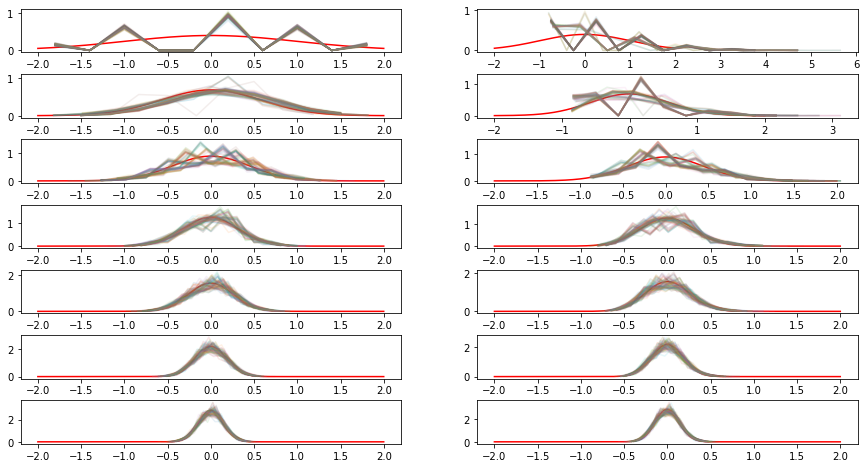

In [20]:
ns = [1,3,5,10,15,30,50]
xs = np.linspace(-2,2,1000)
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(len(ns), len(distribs),hspace=0.5)  
#plotting the graphs
for (i,distrib) in enumerate(distribs) :
    for (l,n) in enumerate(ns):
        ax3 = fig.add_subplot(gs[l,i])
        ax3.plot(xs,norm.pdf(xs,0,1/np.sqrt(n)),alpha=1,color='red')
        for d in range(sampling):
            hist,bins = np.histogram(results[distrib]['zs'][l][:,d],density=True)
            ax3.plot((bins[:-1]+bins[1:])/2,hist,alpha=0.1)